# Bike Sharing Demand

## 시간당 자전거 대여량을 예측하기

## 프로젝트 시작일: 10/05/2021 ~


## 컬럼 설명

(데이터 다운로드: https://www.kaggle.com/c/bike-sharing-demand/data)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다.(ex. 2018-11-01 00:00:00) 
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

## 패키지 불러오기

In [193]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [194]:
# train.csv 파일 읽어오기
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [195]:
# teste.csv 파일 읽어오기
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Preprocessing

datetime(날짜) 컬럼 전처리하기

In [197]:
# 판다스의 to_datetime을 활용해 datetime 컬럼의 타입을 문자열(String)에서 날짜/시간(datetime) 데이터로 바꿔주기
train['datetime'] = pd.to_datetime(train['datetime'])

# train 데이터에 연, 월, 일, 시, 요일명을 나타내는 새로운 컬럼을 생성하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.day_name()

print(train.shape)
train.head()

(10886, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [198]:
# test 데이터도 train 데이터와 마찬가지로 datetime 데이터로 바꿔주기
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.day_name()

print(test.shape)
test.head()

(6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday


### 체감온도와 실제 온도의 관계에 대한 고찰

공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T이다.

여기서 T는 기온, V는 지상 10m 지점에서의 풍속을 의미
1시간당 몇km를 가는 바람인지를 측정, 공식 대입하면 체감온도 산출

영하 10℃에서 풍속이 5km/h일 때 체감온도는 영하 13℃ 지만, 풍속이 30km/h가되면 체감온도가 영하 20℃까지 떨어져 강한 추위를 느끼게 된다.

→ 1시간 단위로 구성된 데이터셋 내에서 풍속, 기온, 체감온도 세 변수는 서로 밀접한 관계가 있음.

참고자료 : [체감온도와 실제 온도의 차이는?](https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/)

### 불쾌지수

- [불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32]
- 기온과 상대습도의 단위는 각각 ℃, %
- 그럼 주어진 데이터 셋의 temp와 humidity 는 기온과 상대습도가 맞는지?
- 주어진 데이터는 Capital Bikeshare의 데이터 (즉, 워싱턴 D.C. 에서 발생한 데이터)  
→ __1957년 미국의 E. C. Thom에 의해 고안된 식__으로 불쾌지수 산출

불쾌지수 = 1.4T-0.55(1-RH)(1.4T-26)+32 (T:기온(℃), RH:상대습도(%))

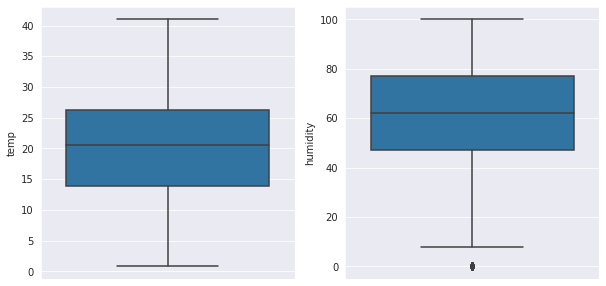

In [199]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(10, 5)


sns.boxplot(data=train, y='temp', orient = "v", ax=ax1)
sns.boxplot(data=train, y='humidity', orient = "v", ax=ax2)
plt.show()

- 워싱턴 연간 날씨에 대해 찾아보니까 어느정도 매치가 되었음 (구글, 연간 워싱턴 날씨 검색)

In [200]:
# 불쾌지수 변수 생성
train['discomfort_index'] = 1.8*train['temp'] - 0.55*(1-train['humidity']/100)*(1.8*train['temp'] - 26) + 32
test['discomfort_index'] = 1.8*test['temp'] - 0.55*(1-test['humidity']/100)*(1.8*test['temp'] - 26) + 32

- 습도는 %단위로 데이터가 구성되어 있어 0.xx로 변환하기 위해 100으로 나누어줌

In [201]:
# 소수점 뒷부분 반올림
train['discomfort_index'] = train['discomfort_index'].round(2)
test['discomfort_index'] = test['discomfort_index'].round(2)

In [202]:
train.loc[:,['temp', 'humidity', 'discomfort_index']].head(10)

,temp,humidity,discomfort_index
0,9.84,81,50.58
1,9.02,80,49.31
2,9.02,80,49.31
3,9.84,75,50.85
4,9.84,75,50.85
5,9.84,75,50.85
6,9.02,80,49.31
7,8.20,86,47.63
8,9.84,75,50.85
9,13.12,76,55.93


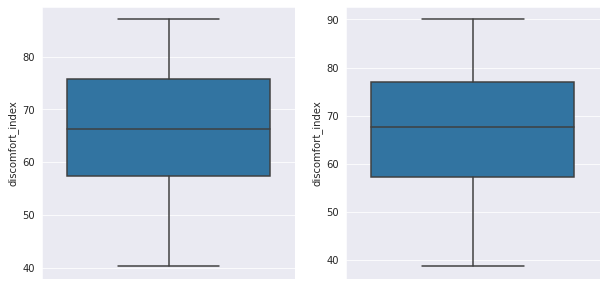

In [203]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(10, 5)

sns.boxplot(data=train, y='discomfort_index', orient = "v", ax=ax1)
sns.boxplot(data=test, y='discomfort_index', orient = "v", ax=ax2)
plt.show()

In [204]:
# 알아보기 쉽게 문자로 바꿔줌

train['season'].replace({1:'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}, inplace = True)
test['season'].replace({1:'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}, inplace = True)

In [205]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,discomfort_index
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday,50.58
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday,49.31
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday,49.31
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday,50.85
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday,50.85


## EDA 
EDA는 크게 두 가지로 살펴볼 것이다. 
1. 시간대에 따라서 살펴볼 것이다.
2. 날씨와 관련된 변수를 통해 살펴볼 것이다.

### 시간대에 따라 살펴보기

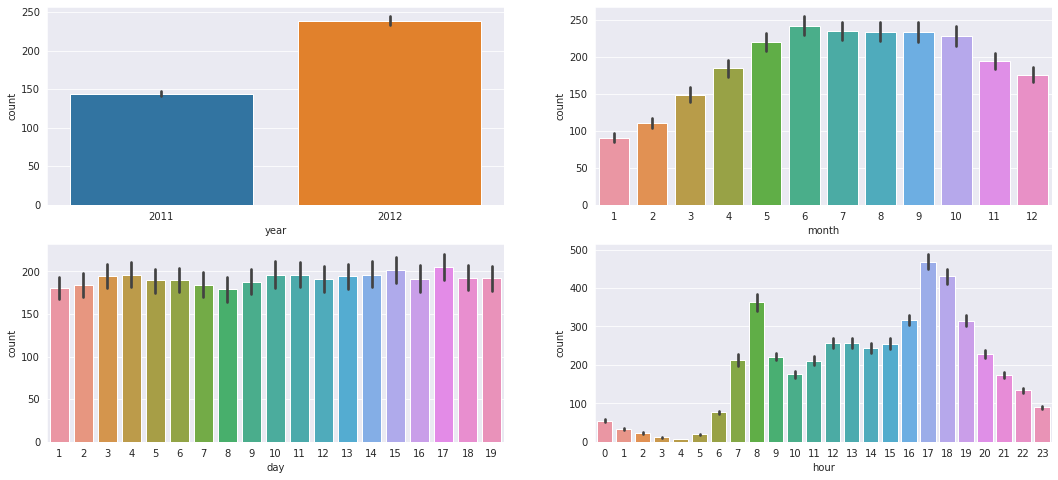

In [206]:
# matplotlib의 subplots를 사용하여 한 화면으로 띄우기
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에 연, 월, 일, 시 자전거 대여량 출력
sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)

plt.show()

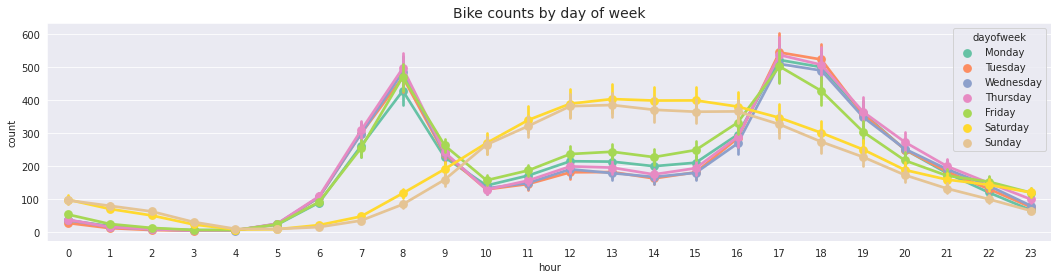

In [207]:
# matplotlib를 활용
plt.figure(figsize = (18, 4))

# 월~일까지의 요일 순서 지정
# dayofweek_order라는 이름의 변수에 할당
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# seaborn의 pointplot으로 dayofweek(요일)과 hour(시간))에 따른 자전거 변화량을 시각화
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", hue_order=dayofweek_order, palette = 'Set2')
plt.title('Bike counts by day of week', size = 14)
plt.show()

### 시각화로 발견할 수 있는 사실
- 이는 근무일 여부에 따라 차이가 나는 것을 볼 수 있다.
- 같은 주말이라고 하더라도 일요일이 토요일보다 자전거 대여량이 낮음 -> 일요일은 다음날이 월요일이기 때문에?
- 같은 주중이라도 금요일이 퇴근하는 시간대(18시 ~ 20시)에 자전거 대여량이 다른 주중에 비해 낮음 -> 불금을 즐기기 위해?
- 금요일은 같은 주중이라고 하더라도 오후 시간대(10시 ~ 16시)에 자전거 대여량이 높음 -> 금요일과 월요일은 주중임에도 불구하고 주말과 끼여있는 요일이기 때문에, 주말의 성향을 어느정도 타는게 아닐까?
- working day, holiday 그래프를 통해 한 번 더 확인해보자.

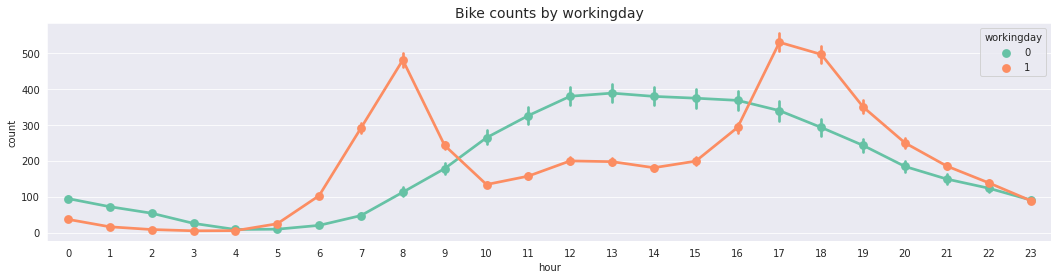

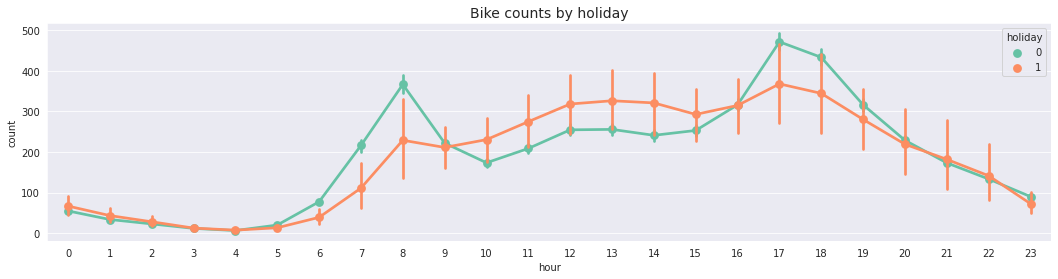

In [208]:
# seaborn의 pointplot으로 workingday(근무일 여부)와 hour(시간)에 따른 자전거 변화량을 시각화
# 확실히 근무하는 날과 근무하지 않는 날의 자전거 대여량이 명확하게 차이가 남

cols = ['workingday', 'holiday']

for col in cols:
    plt.figure(figsize = (18, 4))
    sns.pointplot(data=train, x='hour', y='count', hue=col, palette = 'Set2')
    plt.title('Bike counts by '+ col, size = 14)
    plt.show()

<b> 시각화를 통해 발견한 사실 </b>
- 2012년의 사용량이 2011년보다 많다.
- 날이 따뜻한 6,7,8월의 사용량이 많았고, 겨울의 경우 1월보단 12월의 사용량이 더욱 많았다.
- 일별로 보기엔 19일 밖에 없으므로 보류
- 시간대의 경우, 근무일 여부에 따라 아래와 같은 차이가 났다.
- `working day :  출퇴근 시간대 자전거를 많이 빌림 `
- `holiday : 시간대 자전거를 많이 빌림, 출퇴근 시간대 자전거를 많이 빌림 `

위 두 가지 사실을 통해 파생변수를 생성할 수 있을 것 같다.

In [209]:
# 사용량이 많을 때
# lambda x : [0,1][True일 경우, 1이 반환되므로, [0,1]에서 인덱스 번호가 1인 1이 선택됨]
# lambda x : [0,1][False일 경우, 0이 반환되므로, [0,1]에서 인덱스 번호가 0인 0이 선택됨]
train['peak'] = train[['hour', 'workingday']].apply(lambda x: [0, 1][(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 13)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)
test['peak'] = test[['hour', 'workingday']].apply(lambda x: [0, 1][(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 13)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

### 날씨와 관련된 변수를 통해 살펴보기

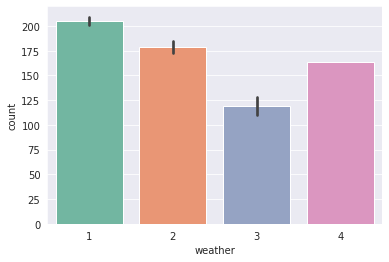

In [210]:
# weather 데이터 시각화하여 자전거 대여량 확인해보기
sns.barplot(data=train, x='weather', y='count', palette = 'Set2')
plt.show()

1 -> 4로 갈수록 날이 험한 것이다. 
- 당연하게도 날이 좋을 때 많이 탄다.
- 4에서 ci (신뢰구간)이 보이지 않는다. 표본이 적은 것으로 보이니 count를 살펴보자

In [211]:
# groupby를 통해 개수 확인
pd.DataFrame(train.groupby('weather')['count'].count())

,count
weather,
1,7192
2,2834
3,859
4,1


4의 표본이 1이므로 3으로 대체해준다.

In [212]:
# 대체해줌.
train['weather'].replace({4 : 3}, inplace = True)

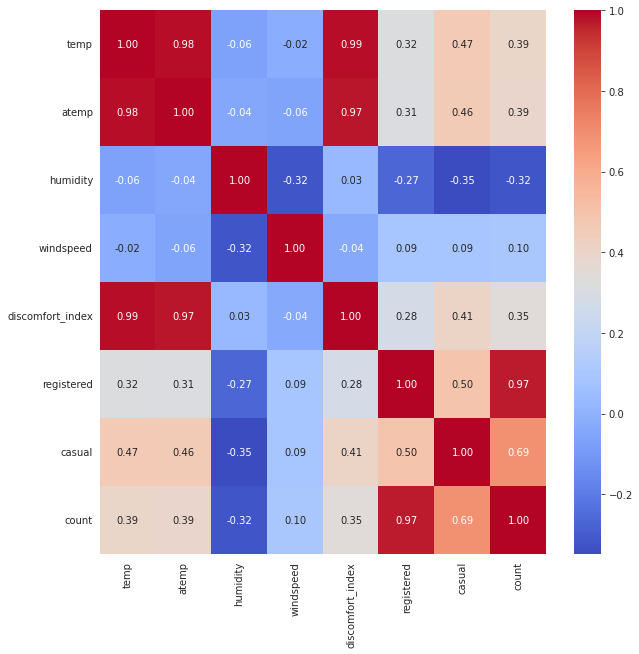

In [213]:
# 상관계수 행렬
plt.figure(figsize = (10,10))

numeric = ['temp', 'atemp', 'humidity', 'windspeed', 'discomfort_index', 'registered', 'casual', 'count']
train_numeric = train.loc[:, numeric]
sns.heatmap(train_numeric.corr(), cmap = 'coolwarm', annot = True, fmt= '.2f')
plt.show()

- registered, casual이 눈에 띈다. registered + casual = count이므로 높은 상관관계를 보인 것으로 보인다.
- 절댓값 기준 hour, temp, atemp, humidty순이다.
- temp와 atemp가 __다중공선성__이 보이므로 살펴보자.


- __분석 결과 추가__
- 상관분석은 피어슨 상관계수를 기반으로 한 분석기법이므로 수치형 변수끼리 관계를 보는 것이 옳다고 판단
- 불쾌지수가 자전거 대여량과 높은 상관관계를 갖는다. 대여량 중에서도 비회원 대여량과 불쾌지수가 높은 상관관계를 가진다.
- 공유 자전거 대여량이 기상 관측 데이터 중에서도 온도, 체감온도, 불쾌지수와 밀접한 관련이 있을 것으로 추정
- `시간` 데이터는 어떻게? -> 시간이 연속적이지 못해서 시계열로 볼 수 없다.

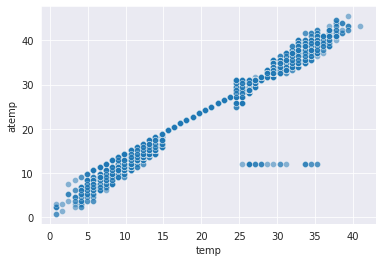

In [214]:
# seaborn의 scatterplot으로 temp(온도)와 atemp(체감온도)의 상관관계를 시각화
sns.scatterplot(data=train, x='temp', y='atemp', alpha = .5)
plt.show()

오른쪽 하단의 일자로 이루어진 scatter들을 자세히 살펴보자.

In [215]:
# temp, atemp 값을 쉽게 확인하기 위해 plotly 라이브러리 사용
import plotly.express as px
px.scatter(data_frame=train, x= 'temp', y= 'atemp', facet_col = 'season', color = 'season')

확인해보니 모두 가을이었다. 저날 체감 온도가 왜 낮았던걸까?

In [216]:
# 이상치인 날을 확인해봄
train.loc[(train['season'] == 'fall') & (train['atemp'] == 12.12)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,discomfort_index,peak
8991,2012-08-17 00:00:00,fall,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012,8,17,0,Friday,76.46,0
8992,2012-08-17 01:00:00,fall,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012,8,17,1,Friday,76.34,0
8993,2012-08-17 02:00:00,fall,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012,8,17,2,Friday,75.84,0
8994,2012-08-17 03:00:00,fall,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012,8,17,3,Friday,75.14,0
8995,2012-08-17 04:00:00,fall,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012,8,17,4,Friday,76.08,0
8996,2012-08-17 05:00:00,fall,0,1,1,26.24,12.12,73,7.0015,2,34,36,2012,8,17,5,Friday,76.08,0
8997,2012-08-17 06:00:00,fall,0,1,1,25.42,12.12,78,8.9981,6,151,157,2012,8,17,6,Friday,75.37,0
8998,2012-08-17 07:00:00,fall,0,1,1,26.24,12.12,73,7.0015,11,368,379,2012,8,17,7,Friday,76.08,0
8999,2012-08-17 08:00:00,fall,0,1,1,27.88,12.12,65,8.9981,43,625,668,2012,8,17,8,Friday,77.53,1
9000,2012-08-17 09:00:00,fall,0,1,1,28.70,12.12,58,7.0015,58,320,378,2012,8,17,9,Friday,77.73,0


확인해보니 모두 8월 17일의 데이터였다. 확인해보면 시간에 따라 날이 점점 안 좋아진다. 하지만 이렇게 차이가 나는지는 의문이다.

어떻게 처리해야할지 같이 고민해봤으면 좋을 것 같다. 일단은 패스

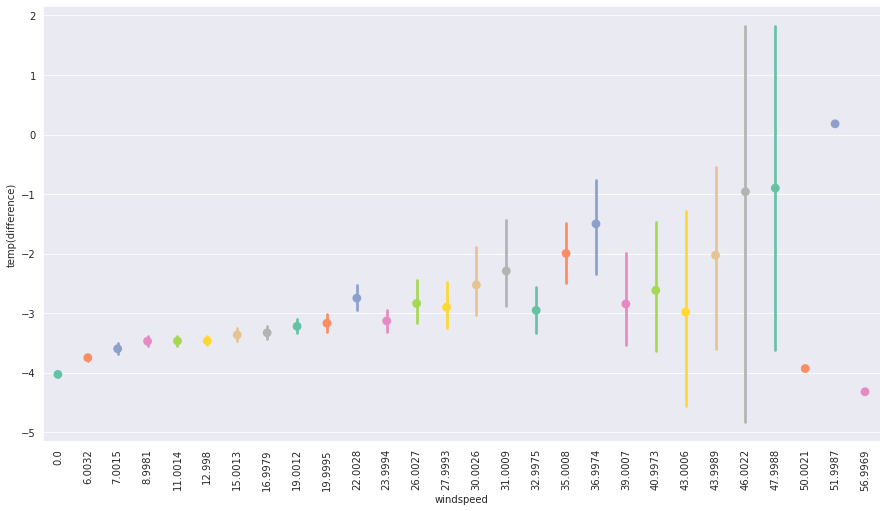

In [217]:
# 파생변수 : 실제 온도와 체감 온도 차이
train['temp(difference)'] = round(train['temp'] - train['atemp'], 2)
test['temp(difference)'] = round(test['temp'] - test['atemp'], 2)

# 풍속과의 연관성
plt.figure(figsize = (15,8))
sns.pointplot(data=train, x="windspeed", y="temp(difference)", palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

실제 온도와 체감 온도의 차이는 풍속 때문이라고 생각했다. 풍속이 높으면 체감 온도가 더 떨어지기 때문에 temp - atemp는 양수가 나올 것이고, 반대라면 temp - atemp는 큰 차이가 없거나 음수가 나올 것이다.

In [218]:
# 대부분의 데이터가 체감 온도가 높은 것으로 확인됨..
train['temp(difference)'].quantile(0.95)

-1.21

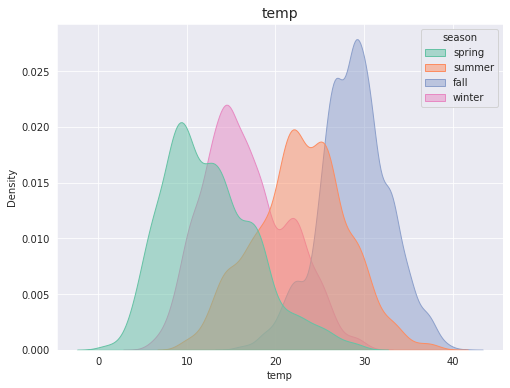

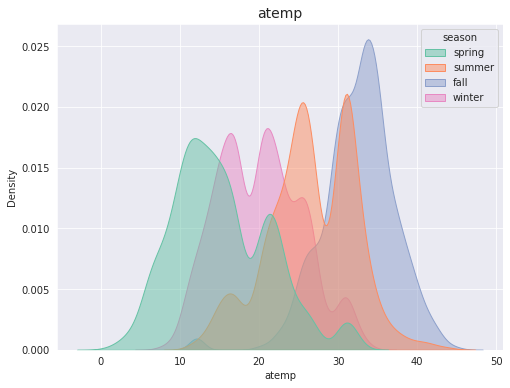

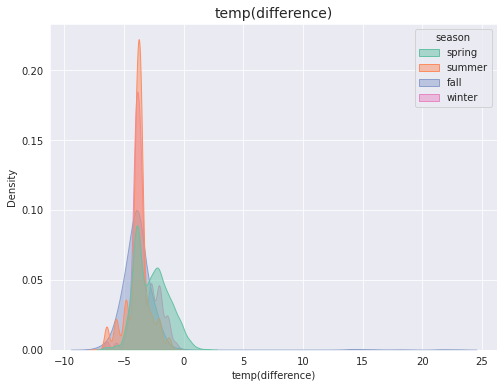

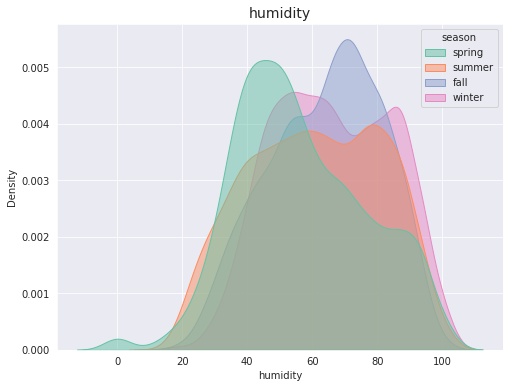

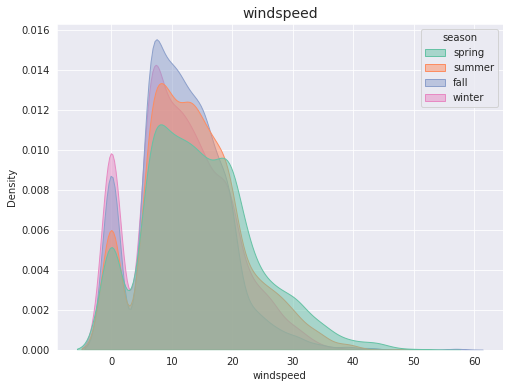

In [219]:
# numerical 변수 kdeplot
cols = ['temp', 'atemp', 'temp(difference)', 'humidity', 'windspeed']
for col in cols:
    plt.figure(figsize = (8,6))
    sns.kdeplot(data = train, x = col, fill = True, hue= 'season', palette='Set2', alpha = .5)
    plt.title(str(col), size = 14)
    plt.show()

- temp와 atemp의 분포에는 살짝 차이가 있는 것으로 보인다.
- 계절에 따라 각 변수마다 차이가 조금씩 있다.
- `windspeed가 0인 날이 꽤 많다. 자세히 봐야겠다.`

In [220]:
# 0을 NaN으로 바꿔줌.
train['windspeed'].replace({0 : np.nan}, inplace = True)
test['windspeed'].replace({0: np.nan}, inplace = True)
train.isnull().sum()

datetime               0
season                 0
holiday                0
workingday             0
weather                0
temp                   0
atemp                  0
humidity               0
windspeed           1313
casual                 0
registered             0
count                  0
year                   0
month                  0
day                    0
hour                   0
dayofweek              0
discomfort_index       0
peak                   0
temp(difference)       0
dtype: int64

In [221]:
# 계절과 날씨에 따른 windspeed
pd.DataFrame(train.groupby(['weather', 'season'])['windspeed'].agg(['mean', 'count']))

mean  count
weather season                  
1       fall    12.960874   1674
        spring  17.191688   1610
        summer  14.866625   1609
        winter  13.896739   1398
2       fall    13.002210    530
        spring  14.455551    624
        summer  14.235828    645
        winter  13.521244    697
3       fall    16.011428    179
        spring  13.841491    189
        summer  16.753620    211
        winter  14.860406    207

In [222]:
# fillna로 결측치 대체
train['windspeed'].fillna(train.groupby(['weather', 'season'])['windspeed'].transform('mean'), inplace = True)
test['windspeed'].fillna(test.groupby(['weather', 'season'])['windspeed'].transform('mean'), inplace = True)

In [223]:
# 확인
train.iloc[0]

datetime            2011-01-01 00:00:00
season                           spring
holiday                               0
workingday                            0
weather                               1
temp                               9.84
atemp                            14.395
humidity                             81
windspeed                       17.1917
casual                                3
registered                           13
count                                16
year                               2011
month                                 1
day                                   1
hour                                  0
dayofweek                      Saturday
discomfort_index                  50.58
peak                                  0
temp(difference)                  -4.56
Name: 0, dtype: object

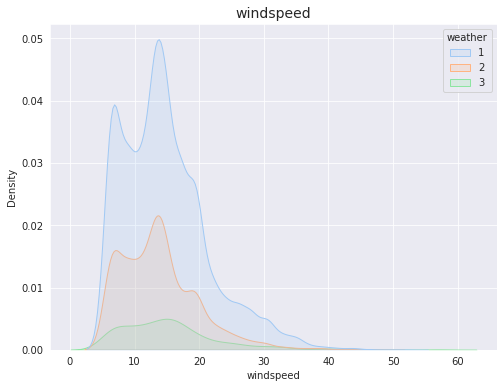

In [224]:
# 풍속 kdeplot
plt.figure(figsize = (8,6))
sns.kdeplot(data = train, x = 'windspeed', fill = True, hue= 'weather', palette='pastel', alpha = .2)
plt.title(str(col), size = 14)
plt.show()

풍속이 0인 데이터들은 모두 사라졌다.

In [225]:
# 자전거 타기 좋은 날
train['ideal'] = train[['temp', 'windspeed']].apply(lambda x: (0, 1)[15 <= x['temp'] <= 22  and x['windspeed'] < 30], axis = 1)
test['ideal'] = test[['temp', 'windspeed']].apply(lambda x: (0, 1)[15 <= x['temp'] <= 22  and x['windspeed'] < 30], axis = 1)

# 죽어도 자전거 타기 싫은 날
train['sticky'] = train[['humidity', 'temp']].apply(lambda x: (0, 1)[x['temp'] >= 30 and x['humidity'] >= 60], axis = 1)
test['sticky'] = test[['humidity', 'temp']].apply(lambda x: (0, 1)[x['temp'] >= 30 and x['humidity'] >= 60], axis = 1)

In [226]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,discomfort_index,peak,temp(difference),ideal,sticky
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,17.191688,3,13,16,2011,1,1,0,Saturday,50.58,0,-4.56,0,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,17.191688,8,32,40,2011,1,1,1,Saturday,49.31,0,-4.62,0,0
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,17.191688,5,27,32,2011,1,1,2,Saturday,49.31,0,-4.62,0,0
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,17.191688,3,10,13,2011,1,1,3,Saturday,50.85,0,-4.56,0,0
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,17.191688,0,1,1,2011,1,1,4,Saturday,50.85,0,-4.56,0,0


[자전거 타기 좋은 날 서베이 링크](https://www.accuweather.com/en/weather-news/what-are-the-best-worst-weather-conditions-for-cycling-2/432641)

## Modeling
- 목표 : 풍속과 대여량은 유의미한 관계가 있을까?
- Poisson Regression Model
  - 포아송 분포는 __단위 시간__ 안에 __어떤 사건__이 __몇 번 발생할 것(Count)__인지를 표현한다.
  - 데이터셋에서 행이 시간단위(1시간)이고 타깃변수인 `count`(공유 자전거 대여량)가 도수 자료이기 때문에 채택

- 가정
 - 반응변수가 포아송 형태인지?
 - 선형성
 - 독립성
 - 평균 = 분산


 - count에서 '0' 이 많을 때 쓰는 모형은 Zero-inflated Possion Regression 이라는데 기존 포아송모형이랑 차이가 있는건지 저도 궁금하네요.

### 가정 1, 반응변수의 형태

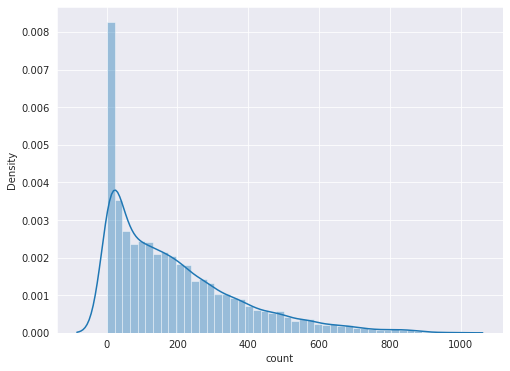

In [227]:
# 반응변수인 `Count`대여량 파악
plt.figure(figsize = (8,6))
sns.distplot(train['count'])
plt.show()

### 가정 2, 평균 = 분산

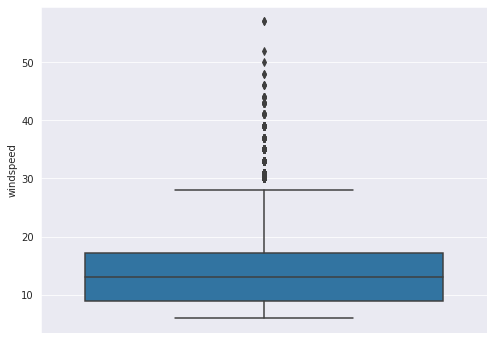

In [228]:
plt.figure(figsize = (8,6))
sns.boxplot(data=train, y='windspeed')
plt.show()

In [229]:
train['windspeed'].describe()

count    10886.000000
mean        14.521261
std          6.662910
min          6.003200
25%          8.998100
50%         13.002210
75%         17.191688
max         56.996900
Name: windspeed, dtype: float64

In [230]:
pd.DataFrame(train.groupby(['windspeed'])['count'].agg(['count','mean', 'var'])).round()

,count,mean,var
windspeed,,,
6.003200,872,148.0,25300.0
7.001500,1034,170.0,29216.0
8.998100,1120,176.0,30037.0
11.001400,1057,202.0,35745.0
12.960874,256,180.0,37755.0
12.998000,1042,202.0,34023.0
13.002210,74,246.0,33107.0
13.521244,110,144.0,25836.0
13.841491,23,100.0,11266.0


- 과대산포, 평균에 비해 분산이 매우큼 → 추후 과대 산포 조절이 필요 (모델링에 영향을 줄 수 있음
 - 과대산포 포아송 회귀 모형
 - 음이항 회귀 모형 고려
- 풍속 구간을 잘라서 접근해야 함. 풍속 경계(boundary)를 어떻게 설정할지 고민해봐야겠음

### 가정 3, 선형성

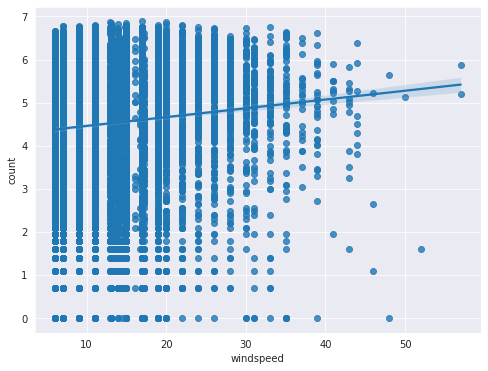

In [231]:
plt.figure(figsize = (8,6))
sns.regplot(x=train['windspeed'] , y = np.log(train['count']), fit_reg=True)
plt.show()

- 선형성을 만족한다고 봐야할지 지금도 고민이 됩니다.

In [232]:
from patsy import dmatrices
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [259]:
# 셋 나누기, train : validation = 7:3
X = train['windspeed']
target = train['count']

X_train, X_valid, y_train, y_valid = train_test_split(X, target, test_size = 0.3, random_state = 614)

In [234]:
# 합치기
train = pd.concat([X_train, y_train], axis = 1)
valid = pd.concat([X_valid, y_valid], axis = 1)

In [235]:
expr = """count ~ windspeed""" # 표현식, 주로 R에서 회귀 모델링할때 씀

In [236]:
y_train, X_train = dmatrices(expr, train, return_type='dataframe')
y_valid, X_valid = dmatrices(expr, valid, return_type='dataframe')

In [237]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [238]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                 7620
Model:                            GLM   Df Residuals:                     7618
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4805e+05
Date:                Tue, 12 Oct 2021   Deviance:                   1.2474e+06
Time:                        11:53:07   Pearson chi2:                 1.29e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1095      0.002   2600.948      0.0

In [239]:
np.exp(0.0094).round(2) # 추정된 회귀계수에 exponential 처리

1.01

- 풍속 한 단위 증가할때마다 1.01배 공유 자전거 대여량이 높아짐

In [240]:
poisson_predictions = poisson_training_results.get_prediction(X_valid)

predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

             mean   mean_se  mean_ci_lower  mean_ci_upper
5991   187.181924  0.161700     186.865267     187.499118
4771   183.689718  0.175740     183.345597     184.034485
8220   198.087001  0.189354     197.716222     198.458476
7861   183.689718  0.175740     183.345597     184.034485
6227   187.181924  0.161700     186.865267     187.499118
...           ...       ...            ...            ...
5037   180.251274  0.197266     179.865053     180.638323
9129   183.689718  0.175740     183.345597     184.034485
966    194.379057  0.167787     194.050478     194.708193
10673  198.087001  0.189354     197.716222     198.458476
8638   187.116386  0.161872     186.799391     187.433919

[3266 rows x 4 columns]


In [241]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_valid['count']

In [242]:
predicted_counts

5991     187.181924
4771     183.689718
8220     198.087001
7861     183.689718
6227     187.181924
            ...    
5037     180.251274
9129     183.689718
966      194.379057
10673    198.087001
8638     187.116386
Name: mean, Length: 3266, dtype: float64

In [243]:
actual_counts

5991      50.0
4771      83.0
8220     196.0
7861     228.0
6227     487.0
         ...  
5037      85.0
9129     482.0
966      228.0
10673      3.0
8638     473.0
Name: count, Length: 3266, dtype: float64

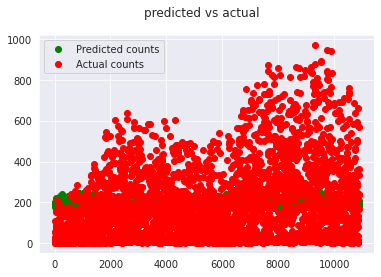

In [248]:
fig = plt.figure()
fig.suptitle('predicted vs actual')
predicted, = plt.plot(X_valid.index, predicted_counts, 'go', label='Predicted counts')
actual, = plt.plot(X_valid.index, actual_counts, 'ro', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

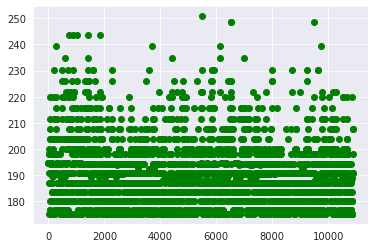

In [249]:
plt.plot(X_valid.index, predicted_counts, 'go', label='Predicted counts')
plt.show()

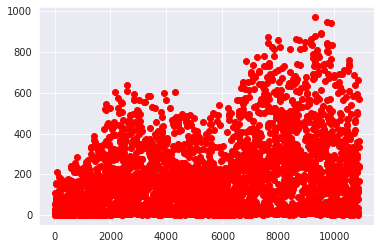

In [250]:
plt.plot(X_valid.index, actual_counts, 'ro', label='Actual counts')
plt.show()

In [261]:
# 회귀 성능 지표, RMSLE 값 구하기
from sklearn.metrics import mean_squared_error, mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(actual_counts, predicted_counts))
RMSLE

1.538374751319822

# 이 밑에꺼는 지우셔도됩니다!

In [254]:
actual_counts.describe()

count    3266.000000
mean      194.406307
std       183.657199
min         1.000000
25%        42.000000
50%       147.000000
75%       286.750000
max       970.000000
Name: count, dtype: float64

In [255]:
predicted_counts.describe()

count    3266.000000
mean      190.077699
std        12.034016
min       175.230522
25%       180.251274
50%       187.189357
75%       194.734690
max       250.760367
Name: mean, dtype: float64